# Banking Predictions
### - Predicts the account balance of a customer in a bank

- [x] Data Cleaning
- [x] Data Exploration
- [x] Data Visualization
- [x] Feature Engineering
- [x] Model Building
- [x] Model Evaluation

## Read the checkings account data from the csv file

In [949]:
import datetime
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Define all functions needed for the project

In [950]:
def reshape_X(
    X_train: np.ndarray or pd.DataFrame, X_test: np.ndarray or pd.DataFrame
) -> tuple:
    if isinstance(X_train, (pd.DataFrame, pd.Series)):
        if X_train.values.ndim == 1:
            X_train = X_train.values.reshape(-1, 1)
    if isinstance(X_test, (pd.DataFrame, pd.Series)):
        if X_test.values.ndim == 1:
            X_test = X_test.values.reshape(-1, 1)
    if isinstance(X_train, np.ndarray):
        if X_train.ndim == 1:
            X_train = X_train.reshape(-1, 1)
    if isinstance(X_test, np.ndarray):
        if X_test.ndim == 1:
            X_test = X_test.reshape(-1, 1)
    return X_train, X_test

In [951]:
def train_test_split_01(data_df: pd.DataFrame, train_size: float = 0.8) -> tuple:
    """
    The function `train_test_split_01` takes a DataFrame and a train size as input, and returns a tuple
    containing the training data and testing data based on the specified train size.

    :param data_df: data_df is a pandas DataFrame that contains the data you want to split into training
    and testing sets. It should have the shape (n_samples, n_features), where n_samples is the number of
    data points and n_features is the number of features or columns in the data
    :type data_df: pd.DataFrame
    :param train_size: The train_size parameter determines the proportion of the data that will be used
    for training. By default, it is set to 0.8, which means that 80% of the data will be used for
    training and 20% will be used for testing
    :type train_size: float
    :return: The function `train_test_split_01` returns a tuple containing the training data and testing
    data.
    """
    data_df = data_df.copy()
    train_index = int(len(data_df) * train_size)
    train_data = data_df.iloc[:train_index]
    test_data = data_df.iloc[train_index:]
    return train_data, test_data

In [952]:
def evaluate_model(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """
    The `evaluate_model` function calculates and prints various evaluation metrics for a regression
    model.

    :param y_actual: `y_actual` is a numpy array that contains the actual values of the target variable
    in a regression problem. These are the true values that we are trying to predict
    :type y_actual: np.ndarray
    :param y_pred: The `y_pred` parameter represents the predicted values of the target variable in a
    regression model. These predicted values are compared to the actual values (`y_actual`) to evaluate
    the performance of the model
    :type y_pred: np.ndarray
    """
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)

In [953]:
def plot_train_test_split(train_data: pd.DataFrame, test_data: pd.DataFrame) -> None:
    """
    This function creates a plot of the train/test split using the matplotlib library.

    :param train_data: The input parameter `train_data` is a pandas DataFrame containing financial data with columns
    "Date" and "Balance". The "Date" column contains dates and the "Balance" column
    contains the corresponding balance values
    :type train_data: pd.DataFrame
    :param test_data: The input parameter `test_data` is a pandas DataFrame containing financial data with columns
    "Date" and "Balance". The "Date" column contains dates and the "Balance" column
    contains the corresponding balance values
    :type test_data: pd.DataFrame
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    train_data.plot(ax=ax, label="Training Set", title="Data Train/Test Split")
    test_data.plot(ax=ax, label="Test Set")
    first_test_date = test_data.iloc[0].name
    ax.axvline(first_test_date, color="black", ls="--")
    ax.legend(["Training Set", "Test Set"])
    plt.show()

In [954]:
def polynomial_regression(
    X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, max_degree: int = 10
) -> np.ndarray:
    """
    The function performs polynomial regression on the given training data and predicts the target
    variable for the given test data using the best degree of polynomial determined through grid search.

    :param X_train: The training input data, which is a matrix or array-like object of shape (n_samples,
    n_features). It contains the features or independent variables used to train the polynomial
    regression model
    :param y_train: The y_train parameter is the target variable or the dependent variable. It
    represents the values that we want to predict or estimate based on the independent variables
    (X_train). In the context of polynomial regression, y_train would typically be a one-dimensional
    array or a column vector containing the observed values of the target
    :param X_test: X_test is a numpy array or pandas DataFrame containing the features (independent
    variables) for which you want to make predictions. It represents the test set on which you want to
    evaluate the performance of the polynomial regression model
    :param max_degree: The `max_degree` parameter specifies the maximum degree of the polynomial
    features to consider in the polynomial regression model. It determines the complexity of the model
    and the number of features that will be generated from the input data. The function will perform a
    grid search to find the best degree within the range of, defaults to 10 (optional)
    :return: the predicted values for the given test data using the polynomial regression model.
    """

    def get_best_degree(
        _X_train: np.ndarray, _y_train: np.ndarray, _max_degree: int
    ) -> int:
        param_grid = {"polynomialfeatures__degree": list(range(1, _max_degree + 1))}
        model = Pipeline(
            [
                ("polynomialfeatures", PolynomialFeatures()),
                ("linearregression", LinearRegression()),
            ]
        )

        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
        grid_search.fit(_X_train, _y_train)
        return grid_search.best_params_["polynomialfeatures__degree"]

    # best_degree = get_best_degree(X_train, y_train, max_degree)
    best_degree = 2

    # Fit polynomial regression model with the best degree
    model = Pipeline(
        [
            ("polynomialfeatures", PolynomialFeatures(degree=best_degree)),
            ("linearregression", LinearRegression()),
        ]
    )
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [955]:
def get_y_pred(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    X_test: pd.DataFrame,
    regression_type: str = "lr",
) -> np.ndarray:
    X_train, X_test = reshape_X(X_train, X_test)
    regressor = LinearRegression()

    if regression_type == "poly":
        return polynomial_regression(X_train, y_train, X_test, max_degree=10)

    model = regressor.fit(X_train, y_train)
    return model.predict(X_test)

In [956]:
def train_test_split_02(
    train_data: pd.DataFrame,
    test_data: pd.DataFrame,
    X_column_name: str,
    y_column_name: str,
) -> tuple:
    train_data = train_data.copy()
    test_data = test_data.copy()

    if train_data.index.name:
        train_data.reset_index(inplace=True)

    if test_data.index.name:
        test_data.reset_index(inplace=True)

    X_train = train_data[X_column_name].apply(lambda x: x.timestamp())
    y_train = train_data[y_column_name]
    X_test = test_data[X_column_name].apply(lambda x: x.timestamp())
    y_test = test_data[y_column_name]
    return X_train, y_train, X_test, y_test

In [957]:
def get_regression_data(
    data_df: pd.DataFrame,
    X_column_name: str,
    y_column_name: str,
    regression_type: str = "lr",
    convert_to_df: bool = True,
) -> pd.DataFrame:
    """Returns a dataframe containing the predicted values for the target variable using the Linear Regression model."""

    data_df = data_df.copy()
    train_data, test_data = train_test_split_01(data_df)
    X_train, y_train, X_test, y_test = train_test_split_02(
        train_data, test_data, X_column_name, y_column_name
    )

    y_train_regression = get_y_pred(X_train, y_train, X_train, regression_type)
    y_test_regression = get_y_pred(X_train, y_train, X_test, regression_type)
    y_regression_data = np.concatenate((y_train_regression, y_test_regression))

    if convert_to_df:
        idx = data_df.index if data_df.index.name else data_df[X_column_name]
        return pd.DataFrame(y_regression_data, columns=[y_column_name], index=idx)
    return y_regression_data

In [958]:
def plot_all_data_with_entire_regression_line(
    data_df: pd.DataFrame,  # data_df contains the unsplit training and testing data
    X_column_name: str,
    y_column_name: str,
    regression_type: str = "lr",
    eval_model: bool = False,
) -> None:
    # Plots training and testing data with the trained regressed data and the future predictions of the regression line
    data_df = data_df.copy()

    regression_df = get_regression_data(
        data_df,
        X_column_name,
        y_column_name,
        regression_type=regression_type,
        convert_to_df=True,
    )
    data_df = data_df[y_column_name].to_frame()

    fig, ax = plt.subplots(figsize=(15, 5))
    data_df.plot(ax=ax, label="Actual", title="Actual vs Linear Regression")
    regression_df.plot(ax=ax, label="Regression Training Data")

    train_data, test_data = train_test_split_01(data_df)
    first_test_date = test_data.iloc[0].name
    ax.axvline(first_test_date, color="black", ls="--")
    ax.legend(["Actual", f"{regression_type.upper()} Predicted"])
    plt.show()

    if eval_model:
        X_train, y_train, X_test, y_test = train_test_split_02(
            train_data, test_data, X_column_name, y_column_name
        )
        y_pred = get_y_pred(X_train, y_train, X_test, regression_type)
        evaluate_model(y_test, y_pred)

In [959]:
def plot_data_with_regression_and_prediction(
    reg_train_data: np.ndarray, y_pred: np.ndarray, data_df: pd.DataFrame
) -> None:
    """
    The function plots the actual values, linear regression training data, and linear regression
    predictions.

    :param reg_train_data: The `reg_train_data` parameter is a numpy array containing the training data
    used for linear regression. It represents the values of the dependent variable (in this case,
    "Balance") that were used to train the linear regression model
    :type reg_train_data: np.ndarray
    :param y_pred: The `y_pred` parameter is a numpy array that contains the predicted values for the
    target variable (in this case, the "Balance" variable) based on a linear regression model
    :type y_pred: np.ndarray
    :param data_df: The `data_df` parameter is a pandas DataFrame that contains the actual values of the
    data. It should have a column named "Balance" that represents the target variable
    :type data_df: pd.DataFrame
    """
    train_index = data_df.index[len(data_df) - len(reg_train_data) :]
    reg_train_df = pd.DataFrame(reg_train_data, columns=["Balance"], index=train_index)
    y_pred_df = pd.DataFrame(y_pred, columns=["Balance"], index=train_index)

    fig, ax = plt.subplots(figsize=(15, 5))
    data_df.plot(
        ax=ax,
        label="Actual",
        title="Actual vs Linear Regression Training Data vs Linear Regression Prediction",
    )
    reg_train_df.plot(ax=ax, label="Linear Regression Training Data")
    y_pred_df.plot(ax=ax, label="Linear Regression Prediction")
    ax.legend(["Actual", "Predicted"])
    ax.axvline(train_index[0], color="black", ls="--")
    plt.show()

In [960]:
def graph_checkings(df: pd.DataFrame) -> None:
    """
    This function creates a scatter plot of balance over time using data from a pandas DataFrame.

    :param df: The input parameter `df` is a pandas DataFrame containing financial data with columns
    "Date" and "Balance". The "Date" column contains dates and the "Balance" column
    contains the corresponding balance values
    :type df: pd.DataFrame
    """
    df = df.copy()
    x = df.index.values
    y = df["Balance"].values

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.scatter(x, y, c="g", alpha=0.7, s=25, label="Balance over time")
    ax.set_title("Balance Over Time", fontsize="xx-large", fontweight="bold")
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

In [961]:
def X_y_split(
    train_data: pd.DataFrame, X_column_name: str, y_column_name: str
) -> tuple:
    """
    The function `X_y_split` takes a DataFrame, X column name, and y column name as input, and returns
    the X and y arrays for machine learning training.

    :param train_data: The `train_data` parameter is a pandas DataFrame that contains the training data.
    It should have columns for both the X values and the y values
    :type train_data: pd.DataFrame
    :param X_column_name: The X_column_name parameter is the name of the column in the train_data
    DataFrame that contains the input features for the model
    :type X_column_name: str
    :param y_column_name: The `y_column_name` parameter is the name of the column in the `train_data`
    DataFrame that contains the target variable or the variable you want to predict
    :type y_column_name: str
    :return: a tuple containing two values: X and y.
    """
    train_data = train_data.copy()

    if train_data.index.name:
        train_data.reset_index(inplace=True)

    X = train_data[X_column_name].apply(lambda x: x.timestamp())
    X = X.values.reshape(-1, 1)
    y = train_data[y_column_name].values
    return X, y

In [962]:
def plot_train_data_with_regression(
    train_df: pd.DataFrame,
    X_column_name: str,
    y_column_name: str,
    regression_type: str = "lr",
    eval_model: bool = False,
) -> None:
    """
    The function `plot_data_with_regression` plots the training data with the regression training data,
    and optionally evaluates the model's performance. There are no future predictions in this plot.

    :param data_df: The `data_df` parameter is a pandas DataFrame that contains the data you want to
    plot
    :type data_df: pd.DataFrame
    :param X_column_name: The name of the column in the data DataFrame that contains the independent
    variable (X)
    :type X_column_name: str
    :param y_column_name: The `y_column_name` parameter is the name of the column in the `data_df`
    DataFrame that contains the target variable (dependent variable) that you want to predict
    :type y_column_name: str
    :param eval_model: The `eval_model` parameter is a boolean flag that determines whether or not to
    evaluate the performance of the regression model. If `eval_model` is set to `True`, the
    `evaluate_model` function will be called to calculate and display evaluation metrics for the model.
    If `eval_model` is, defaults to False
    :type eval_model: bool (optional)
    """
    train_df = train_df.copy()

    X, y = X_y_split(train_df, X_column_name=X_column_name, y_column_name=y_column_name)
    X_df = pd.DataFrame(X, columns=[X_column_name])
    y_df = pd.DataFrame(y, columns=[y_column_name])

    # Line below is not actually getting any predictions,
    # just returning the regression line through the training data
    reggression_train_data = get_y_pred(X_df, y_df, X_df, regression_type)

    data = train_df[y_column_name]
    reg_train_df = pd.DataFrame(reggression_train_data, index=data.index)

    fig, ax = plt.subplots(figsize=(15, 5))
    data.plot(ax=ax, label="Actual", title="Actual vs Linear Regression Training Data")
    reg_train_df.plot(ax=ax, label="Regression Training Data")
    ax.legend(["Actual", "Predicted"])
    plt.show()

    if eval_model:
        evaluate_model(y_test=y, y_pred=reggression_train_data)

In [963]:
def combine_dfs(foldername: str, filename: str) -> pd.DataFrame:
    """
    This function combines multiple dataframes from a specified folder into a single dataframe.

    :param foldername: The name of the folder where the data files are stored
    :type foldername: str
    :param filename: The name of the file that you want to combine with other files in the folder
    :type filename: str
    """
    result_df = pd.DataFrame()
    for root, dirs, files in os.walk(foldername):
        for name in sorted(files):
            if name.startswith(filename):
                _filename = os.path.join(root, name)
                df = pd.read_csv(_filename, index_col=False)
                # df_reversed = df[::-1].reset_index(drop=True)
                result_df = pd.concat([df, result_df])
    return result_df

In [964]:
def get_first_test_date(df: pd.DataFrame, X_column_name: str) -> datetime.datetime:
    return df.index[0] if df.index.name else df[X_column_name][0]


def get_first_date_ts(df: pd.DataFrame, X_column_name: str) -> float:
    return get_first_test_date(df, X_column_name).timestamp()

### Read in the data

In [965]:
data_folder = "Chase_Banking_Transactions"
data_folder = "Bank_Data"
df_checkings = combine_dfs(data_folder, "checkings.csv")
df_checkings = df_checkings.rename(columns={"Posting Date": "Date"})
df_checkings = df_checkings.set_index("Date")
df_checkings.index = pd.to_datetime(df_checkings.index)

### Inspect the data

In [966]:
df_checkings.head()

,Details,Amount,Type,Balance,Check or Slip #
Date,,,,,
2010-01-01,DEBIT,-79.0,DEBIT_CARD,813.46,NaN
2010-01-02,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-03,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-04,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-05,DEBIT,-799.0,ACCT_XFER,13.46,NaN


### Plot the data

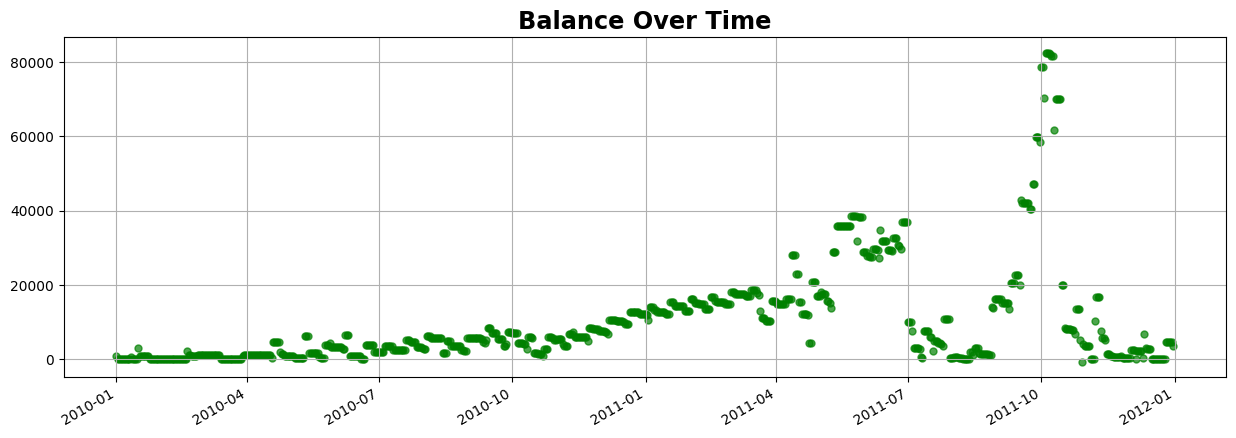

In [967]:
graph_checkings(df_checkings)

# Data Cleaning

### Drop all unnecessary columns

In [968]:
balance_df = df_checkings.drop(columns=["Amount", "Details", "Type", "Check or Slip #"])
balance_df.head()

,Balance
Date,
2010-01-01,813.46
2010-01-02,13.46
2010-01-03,13.46
2010-01-04,13.46
2010-01-05,13.46


### Notice the multiple data points on the same day
- If there are multiple transactions on the same day, the balance will be recorded multiple times

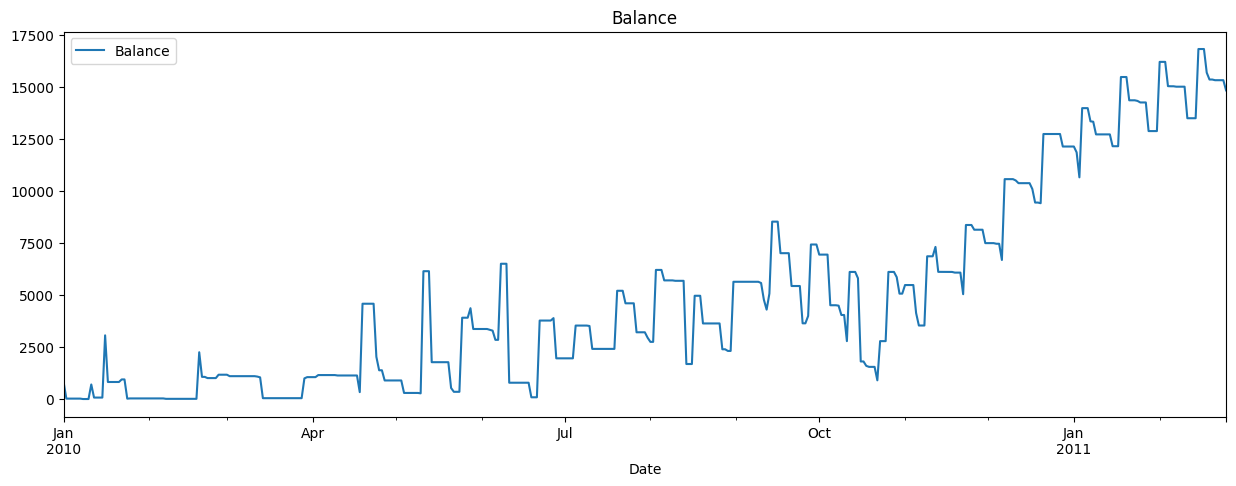

In [969]:
# Limit the amount of data to train and test on in order to make it more reliable.
# This is not always necessary, but I'm choosing this because the last year or so
# of data is erratic and not representative of the overall trend.
end_date = balance_df.index[420]
balance_df = balance_df.loc[:end_date].copy()
balance_df.plot(figsize=(15, 5), title="Balance")
plt.show()

## Get the training and testing set of data

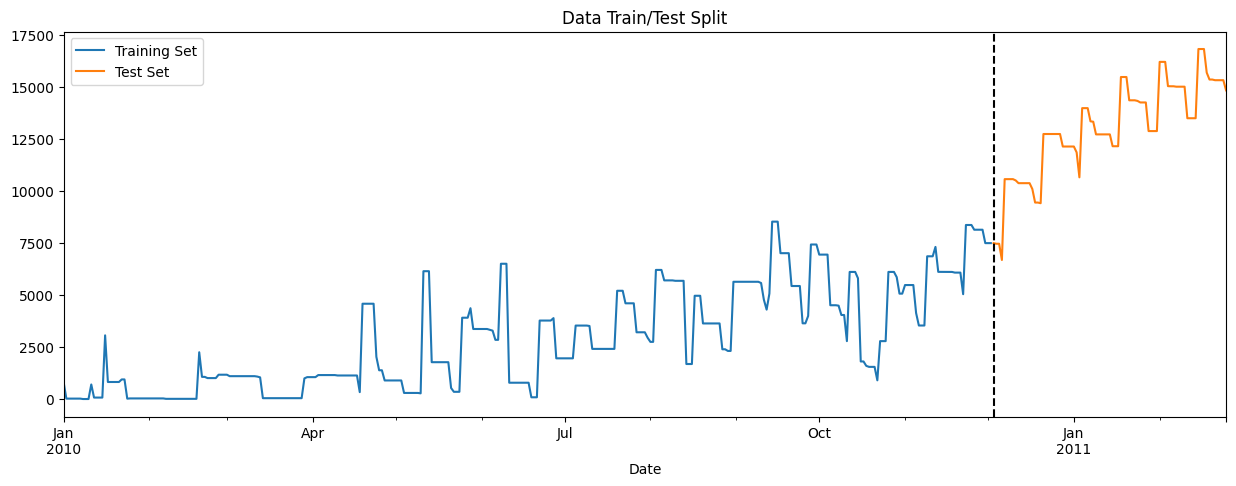

In [970]:
train_data, test_data = train_test_split_01(balance_df)
X_train, y_train, X_test, y_test = train_test_split_02(
    train_data, test_data, "Date", "Balance"
)
plot_train_test_split(train_data, test_data)

### Plot regression line through training data to see the trend

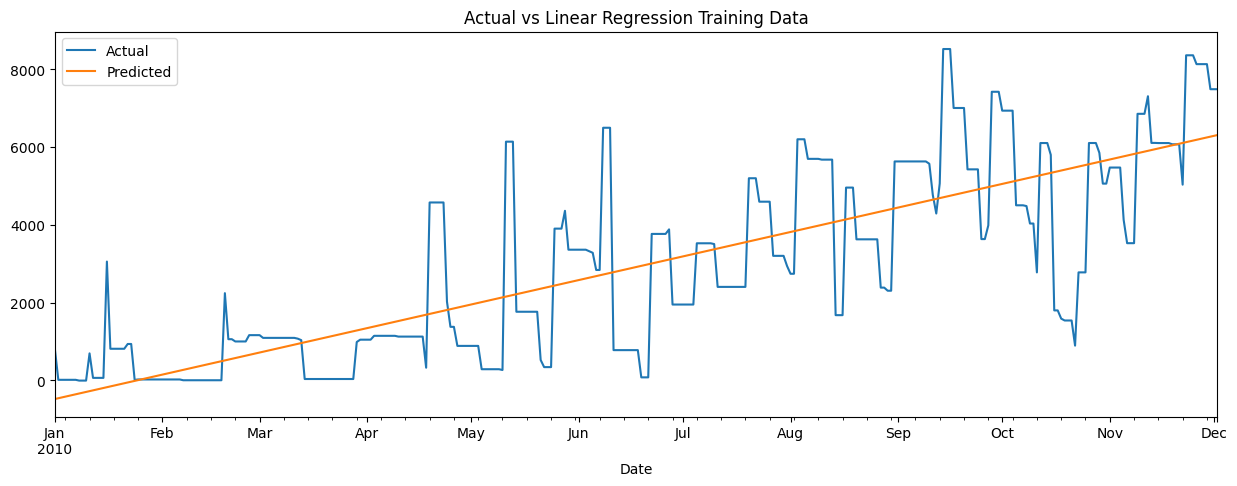

Mean Squared Error (MSE): 2190844.0841175197
Root Mean Squared Error (RMSE): 1480.15002081462
Mean Absolute Error (MAE): 1133.5585328475718
R-squared (R2) Score: 0.6381289699514634


In [971]:
plot_train_data_with_regression(
    train_data, "Date", "Balance", regression_type="lr", eval_model=True
)

### Plot the prediction

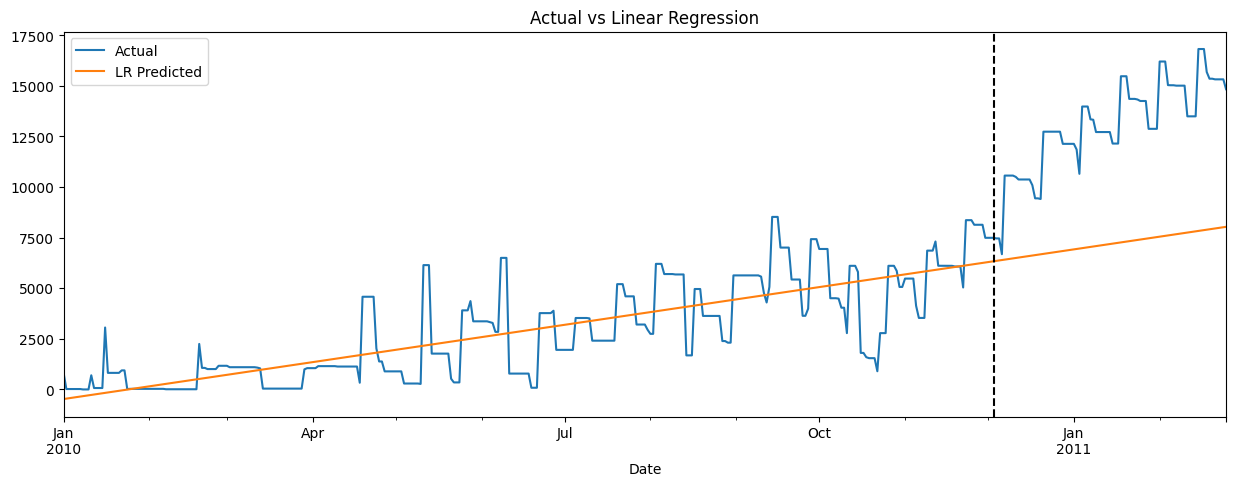

Mean Squared Error (MSE): 37266358.63238814
Root Mean Squared Error (RMSE): 6104.617812147468
Mean Absolute Error (MAE): 5813.437763623465
R-squared (R2) Score: -6.240722789901945


In [972]:
y_pred = get_y_pred(X_train, y_train, X_test, regression_type="lr")
plot_all_data_with_entire_regression_line(
    balance_df, "Date", "Balance", regression_type="lr", eval_model=True
)

## Prediction isn't good, lets see if we can do better
- Take a rolling average of the data
- Plot the rolling average of the Balance alongside the actual Balance
- Plot the regression line through the rolling average data
- Plot the prediction

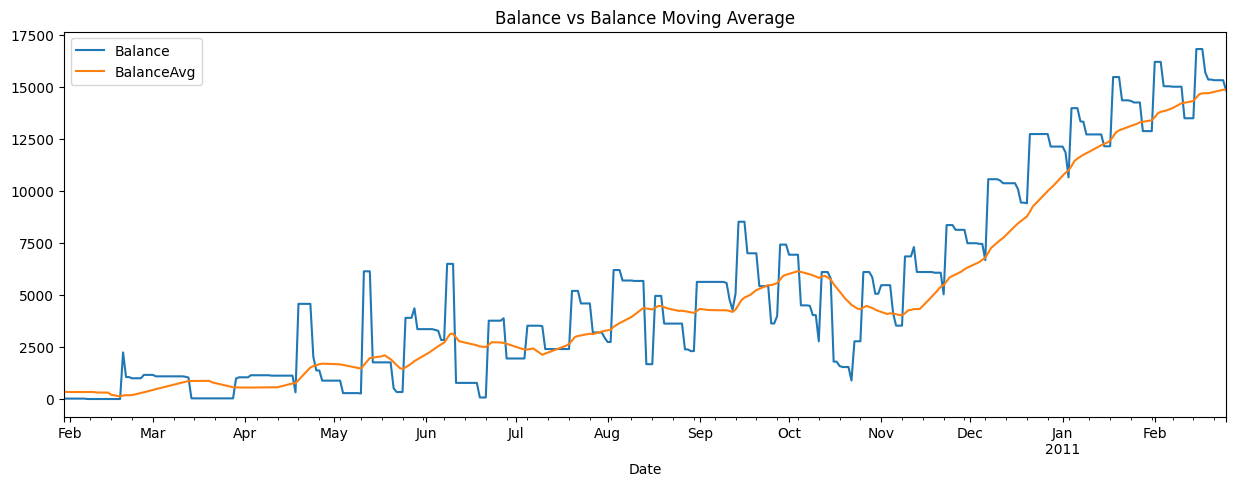

In [973]:
# Take the rolling mean of the two columns
window = 30

balance_df["BalanceAvg"] = balance_df["Balance"].rolling(window).mean()

# get the first date where BalanceAvg is not null
bal_avg_df = balance_df[balance_df["BalanceAvg"].notnull()]

# plot the avg columns
fig, ax = plt.subplots(figsize=(15, 5))
bal_avg_df.plot(ax=ax, label="Balance", title="Balance vs Balance Moving Average")
plt.show()

# Plot regression line through the rolling average data

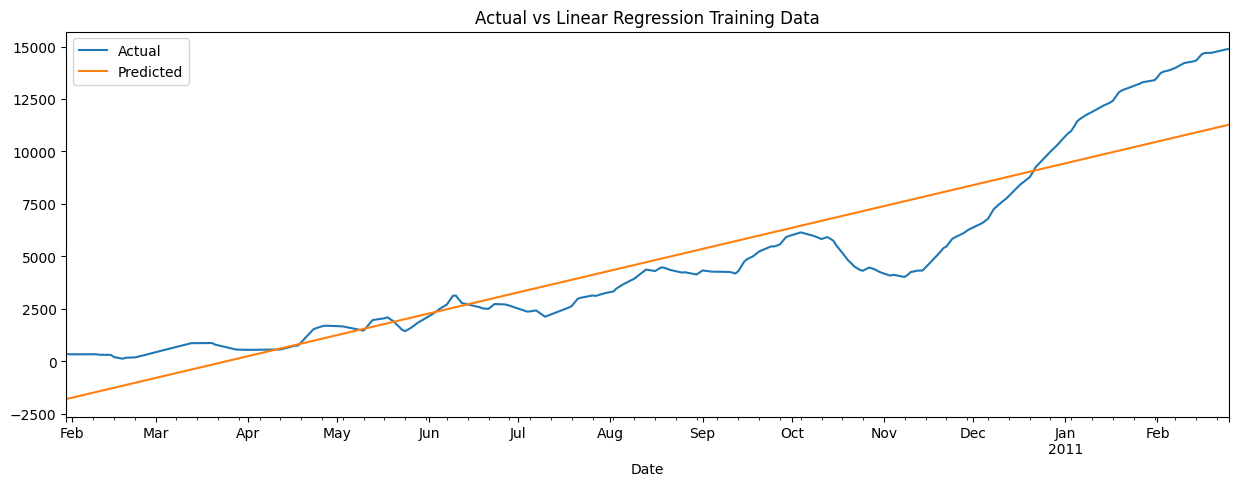

Mean Squared Error (MSE): 2878326.6284816964
Root Mean Squared Error (RMSE): 1696.5631813998841
Mean Absolute Error (MAE): 1326.7669425921586
R-squared (R2) Score: 0.8324196703709931


In [974]:
plot_train_data_with_regression(
    bal_avg_df,
    X_column_name="Date",
    y_column_name="BalanceAvg",
    eval_model=True,
)

# Apply Train Test Split for the rolling average data

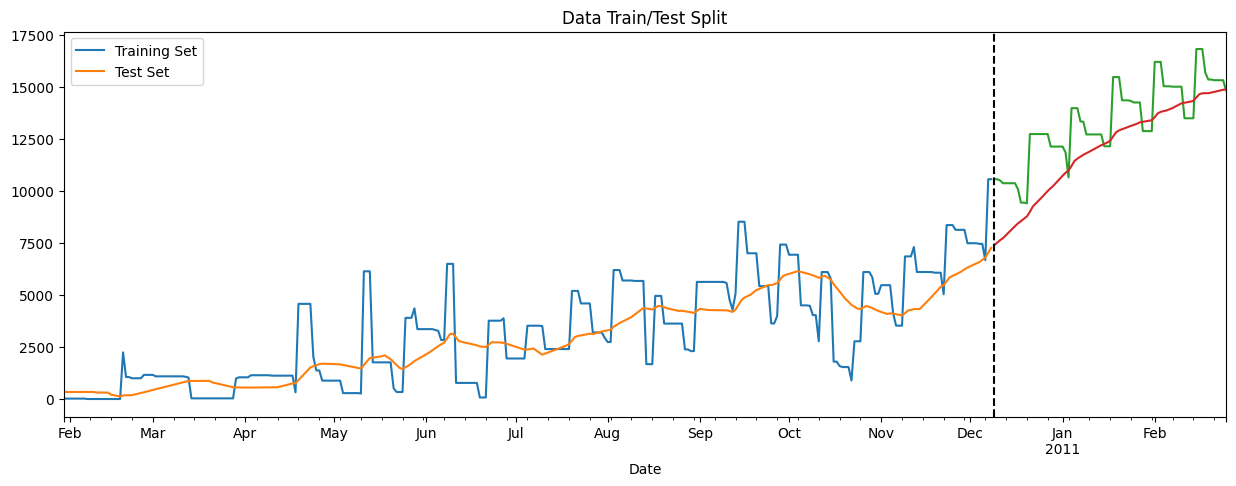

In [975]:
train_data, test_data = train_test_split_01(bal_avg_df)
plot_train_test_split(train_data, test_data)

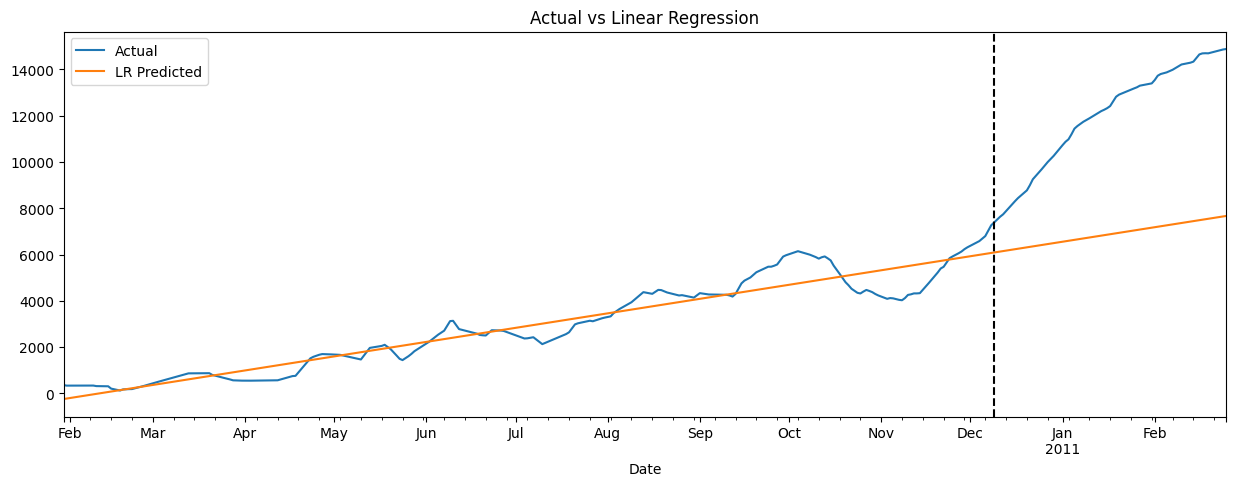

Mean Squared Error (MSE): 29292037.16930448
Root Mean Squared Error (RMSE): 5412.2118555452425
Mean Absolute Error (MAE): 5099.633037552185
R-squared (R2) Score: -4.727067175495426


In [976]:
X_train, y_train, X_test, y_test = train_test_split_02(
    train_data, test_data, "Date", "BalanceAvg"
)

plot_all_data_with_entire_regression_line(
    bal_avg_df, "Date", "BalanceAvg", regression_type="lr", eval_model=True
)

# The model is still not good, lets try a different model - Polynomial Regression
- Apply polynomial regression on the `Balance` column
- Plot the regression line through the data
- Apply polynomial prediction on the Test/Train split data
- Plot the prediction

In [977]:
balance_df = balance_df.copy()
balance_df

,Balance,BalanceAvg
Date,,
2010-01-01,813.46,NaN
2010-01-02,13.46,NaN
2010-01-03,13.46,NaN
2010-01-04,13.46,NaN
2010-01-05,13.46,NaN
...,...,...
2011-02-21,15320.22,14759.740667
2011-02-22,15320.22,14791.940000
2011-02-23,15320.22,14825.148000


In [978]:
# Clean the data such that we start with no Nan values
balance_df = balance_df[balance_df["BalanceAvg"].notnull()]
balance_df.reset_index(inplace=True)
balance_df

,Date,Balance,BalanceAvg
0,2010-01-30,22.34,365.114000
1,2010-01-31,22.34,338.743333
2,2010-02-01,22.34,339.039333
3,2010-02-02,22.34,339.335333
4,2010-02-03,22.34,339.631333
...,...,...,...
387,2011-02-21,15320.22,14759.740667
388,2011-02-22,15320.22,14791.940000
389,2011-02-23,15320.22,14825.148000
390,2011-02-24,15320.22,14860.808000


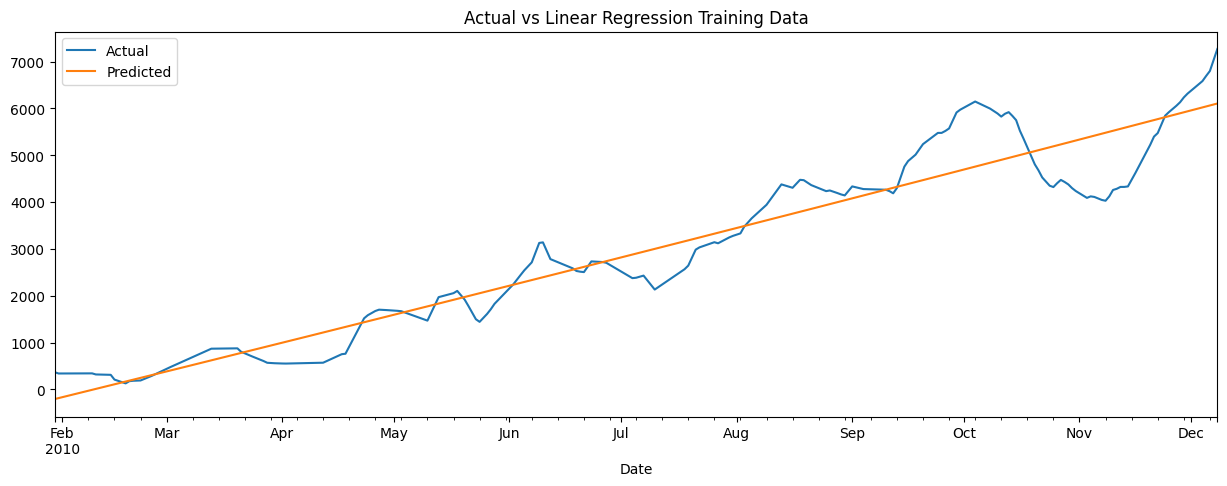

Mean Squared Error (MSE): 323993.8162358883
Root Mean Squared Error (RMSE): 569.2045469213051
Mean Absolute Error (MAE): 432.8465871594704
R-squared (R2) Score: 0.9115689836535947


In [979]:
# Plot the actual values vs the predicted values
bal_avg_df = balance_df["BalanceAvg"].to_frame().copy()
bal_avg_df.index = balance_df["Date"].copy()

train_data, test_data = train_test_split_01(bal_avg_df)
plot_train_data_with_regression(
    train_data, "Date", "BalanceAvg", regression_type="poly", eval_model=True
)

# Apply Test Train Split for the polynomial regression data

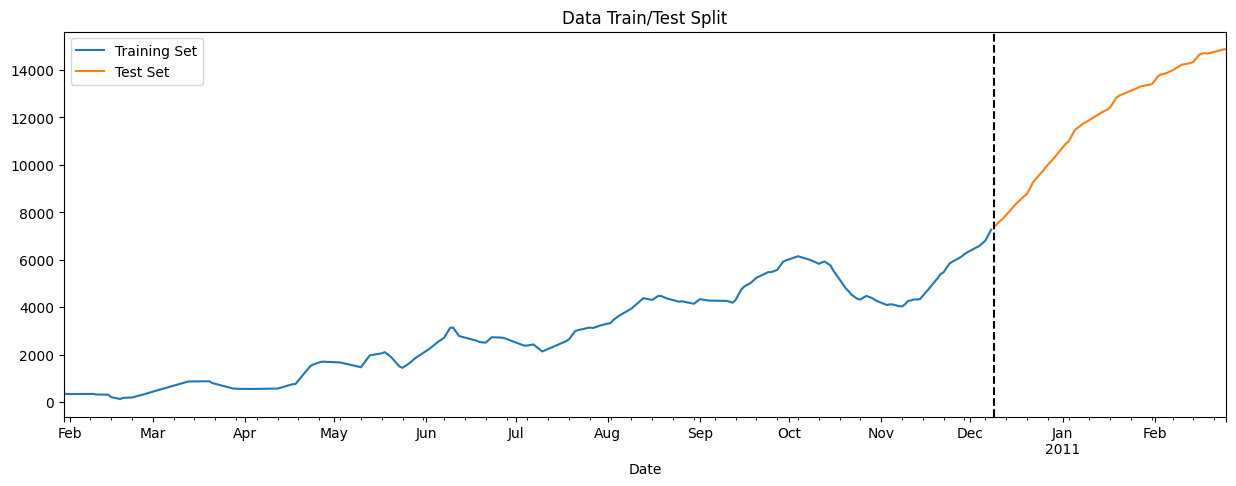

In [980]:
plot_train_test_split(train_data, test_data)

## Graph the entire regression line not just the test data

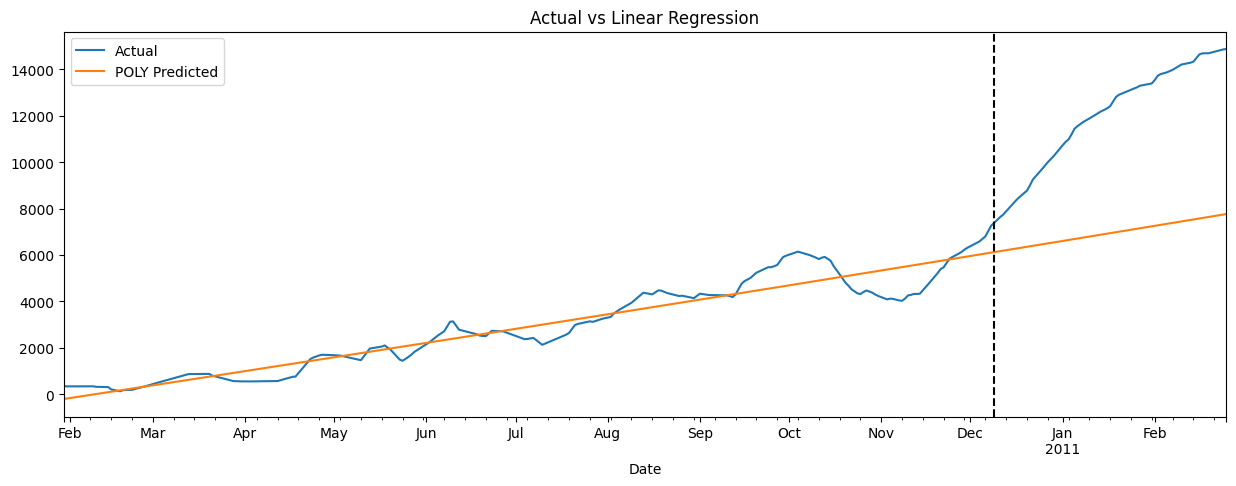

Mean Squared Error (MSE): 28577752.07060236
Root Mean Squared Error (RMSE): 5345.816314708387
Mean Absolute Error (MAE): 5035.479515764519
R-squared (R2) Score: -4.587412882450586


In [981]:
plot_all_data_with_entire_regression_line(
    bal_avg_df, "Date", "BalanceAvg", regression_type="poly", eval_model=True
)

# As you can see, neither model is very good.
- The data is not linear, so linear regression is not a good model
- Polynomial regression is not a good model either because the data is not polynomial
- Lets try a different model - Random Forest Regression
- Apply random forest regression on the `Balance` column
- Plot the regression line through the data
- Apply random forest prediction on the Test/Train split data
- Plot the prediction
